# Counting Sheep, Courting Sleep:

## Using Python Data Analysis Tools to Find the Perfect Recipe for a Good Night's Sleep

### Step One: Reading and Cleaning

Because I am the creator and owner of the data for this project, and I compiled it by converting a Google Sheet to a CSV file, I was able to clean up the column names while still in the Sheet. This seemed an easier solution than converting via pandas after reading in the data. Google Forms outputs to its associated Google Sheet with the column names being the full question asked in that cell on the Form. I changed these to simple titles in all lower case with words separated by underscores to make them more Pythonic. For reference, below are screen shots of the Sheet before and after the name cleanup.

![Sleep Sheet Before Column Cleanup](images/sleep_sheet_before_cleanup.png)

![Sleep Sheet After Column Cleanup](images/sleep_sheet_after_cleanup.png)

First, we will import the pandas and Numpy libraries to help us manipulate our data.

In [147]:
import pandas as pd
import numpy as np

Then we will use pandas to read in our sleep tracking CSV file and, to make sure the data came in correctly, we will check the first five rows.

In [148]:
sleep_df = pd.read_csv('sleep_data_tracking_2023.csv')
sleep_df.head()

,Timestamp,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
0,2/8/2023 9:10:02,2/7/2023,Tuesday,7.30,3.0,12.0,80.0,5.0,61.0,69.0,8.0,12.5,No,Yes,No,No,Yes,No,Yes
1,2/9/2023 7:56:47,2/8/2023,Wednesday,6.83,5.0,22.0,67.0,6.0,62.0,78.0,8.0,12.5,Yes,Yes,No,No,No,No,Yes
2,2/10/2023 12:10:24,2/9/2023,Thursday,6.68,4.0,11.0,79.0,6.0,61.0,73.0,8.5,12.5,Yes,Yes,No,No,Yes,No,No
3,2/12/2023 17:32:05,2/10/2023,Friday,7.50,4.0,14.0,78.0,4.0,59.0,70.0,9.0,14.0,No,Yes,No,No,No,No,Yes
4,2/12/2023 17:34:12,2/11/2023,Saturday,6.55,3.0,21.0,71.0,5.0,58.0,76.0,8.0,15.0,No,No,No,No,No,No,No


Looks good! Now let's get a feel for our DataFrame and the data types it contains.

In [149]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        31 non-null     object 
 1   sleep_date       31 non-null     object 
 2   day_of_the_week  31 non-null     object 
 3   hours_sleep      31 non-null     float64
 4   awake_pct        30 non-null     float64
 5   rem_pct          30 non-null     float64
 6   core_pct         30 non-null     float64
 7   deep_pct         30 non-null     float64
 8   hr_bpm_min       30 non-null     float64
 9   hr_bpm_max       30 non-null     float64
 10  resp_rate_min    30 non-null     float64
 11  resp_rate_max    30 non-null     float64
 12  melatonin        31 non-null     object 
 13  magnesium        31 non-null     object 
 14  neuriva          31 non-null     object 
 15  chamomile        31 non-null     object 
 16  bath             31 non-null     object 
 17  shower           3

We will be dealing with floats and strings in this DataFrame. Now let's get a count of the number of rows and columns.

In [150]:
sleep_df.shape

(31, 19)

Our data set has 31 rows and 19 columns. Quickly comparing the number of rows to the number of non-null values given in the output of cell 3 above, our data is pretty clean in terms of null values. We will have a little cleanup to do with those later.

The "Timestamp" column came in from our Google Sheet because that can't be deleted in Sheets; it can only be hidden. That information is not needed for our analysis; that's simply the time each data submission went into the Google Form. Therefore, that column can be deleted.

In [151]:
del sleep_df['Timestamp']

Let's check our first five rows to make sure that worked.

In [152]:
sleep_df.head()

,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
0,2/7/2023,Tuesday,7.30,3.0,12.0,80.0,5.0,61.0,69.0,8.0,12.5,No,Yes,No,No,Yes,No,Yes
1,2/8/2023,Wednesday,6.83,5.0,22.0,67.0,6.0,62.0,78.0,8.0,12.5,Yes,Yes,No,No,No,No,Yes
2,2/9/2023,Thursday,6.68,4.0,11.0,79.0,6.0,61.0,73.0,8.5,12.5,Yes,Yes,No,No,Yes,No,No
3,2/10/2023,Friday,7.50,4.0,14.0,78.0,4.0,59.0,70.0,9.0,14.0,No,Yes,No,No,No,No,Yes
4,2/11/2023,Saturday,6.55,3.0,21.0,71.0,5.0,58.0,76.0,8.0,15.0,No,No,No,No,No,No,No


And now let's get a new count of the number of rows and columns.

In [153]:
sleep_df.shape

(31, 18)

Because this data came from daily Google Form submissions, human errors in submitting were probably made. (Especially since the subject is sleep-deprived enough to want to study her own sleep.) It's easy to accidentally send duplicate responses, and when that happens, the respondent can't fix it on their own. Only the Form owner can. So let's see if we have any duplicate entries.

In [154]:
dups = sleep_df[sleep_df.duplicated('sleep_date', keep=False)]
print(dups)

   sleep_date day_of_the_week  hours_sleep  awake_pct  rem_pct  core_pct  \
16  2/23/2023        Thursday         6.48        2.0     17.0      74.0   
17  2/23/2023        Thursday         6.53        4.0     20.0      74.0   

    deep_pct  hr_bpm_min  hr_bpm_max  resp_rate_min  resp_rate_max melatonin  \
16       7.0        59.0        73.0            8.5           13.0        No   
17       2.0        62.0        77.0            9.0           14.5        No   

   magnesium neuriva chamomile bath shower meditation  
16       Yes     Yes        No  Yes     No        Yes  
17       Yes     Yes        No  Yes     No        Yes  


Hmm, it looks as though there's a duplicate entry for 2/23, but not all the data is a duplicate. Let's look at the rows before and after these values at index 16 and 17 to see if there is anything we should delete.

In [155]:
dup_rows = sleep_df.iloc[15:19]
print(dup_rows)

   sleep_date day_of_the_week  hours_sleep  awake_pct  rem_pct  core_pct  \
15  2/22/2023       Wednesday         6.48        2.0     17.0      74.0   
16  2/23/2023        Thursday         6.48        2.0     17.0      74.0   
17  2/23/2023        Thursday         6.53        4.0     20.0      74.0   
18  2/24/2023          Friday         7.40        4.0     10.0      79.0   

    deep_pct  hr_bpm_min  hr_bpm_max  resp_rate_min  resp_rate_max melatonin  \
15       7.0        59.0        73.0            8.5           13.0        No   
16       7.0        59.0        73.0            8.5           13.0        No   
17       2.0        62.0        77.0            9.0           14.5        No   
18       7.0        60.0        70.0            9.0           13.0        No   

   magnesium neuriva chamomile bath shower meditation  
15       Yes     Yes        No   No    Yes        Yes  
16       Yes     Yes        No  Yes     No        Yes  
17       Yes     Yes        No  Yes     No        

It looks like the sleep respondent accidentally submitted the same data in indexes 15 and 16 but with different dates. We know that we can delete the row at index 16. 

In [156]:
sleep_df.drop([16], inplace=True)

Now, let's check the rows in that area to make sure we dropped what we wanted to drop.

In [157]:
dup_rows = sleep_df.iloc[14:19]
print(dup_rows)

   sleep_date day_of_the_week  hours_sleep  awake_pct  rem_pct  core_pct  \
14  2/21/2023         Tuesday         6.87        2.0     16.0      73.0   
15  2/22/2023       Wednesday         6.48        2.0     17.0      74.0   
17  2/23/2023        Thursday         6.53        4.0     20.0      74.0   
18  2/24/2023          Friday         7.40        4.0     10.0      79.0   
19  2/25/2023        Saturday         6.77        4.0      9.0      83.0   

    deep_pct  hr_bpm_min  hr_bpm_max  resp_rate_min  resp_rate_max melatonin  \
14       9.0        63.0        75.0            9.0           12.5        No   
15       7.0        59.0        73.0            8.5           13.0        No   
17       2.0        62.0        77.0            9.0           14.5        No   
18       7.0        60.0        70.0            9.0           13.0        No   
19       4.0        62.0        76.0            9.0           13.5       Yes   

   magnesium neuriva chamomile bath shower meditation  
14    

Looks good. 
We know we have a small number of null values from the numbers output in cell 3. If there was a night where the respondent's Watch did not record sleep data, that could cause a row with multiple null values. For our purposes, an occasional isolated null value won't have a great impact on the overall calcuations and correlations. Those could be filled with the column mean. But if one row (one night's sleep) is missing multiple metrics, it can be deleted from the DataFrame for ease of computation and more accurate data findings. 

In [158]:
sleep_df.isnull().sum()

sleep_date         0
day_of_the_week    0
hours_sleep        0
awake_pct          1
rem_pct            1
core_pct           1
deep_pct           1
hr_bpm_min         1
hr_bpm_max         1
resp_rate_min      1
resp_rate_max      1
melatonin          0
magnesium          0
neuriva            0
chamomile          0
bath               0
shower             0
meditation         0
dtype: int64

We have 1 null value in each of these columns: awake_pct, rem_pct, core_pct, deep_pct, hr_bpm_min, hr_bpm_max, resp_rate_min, and resp_rate_max. This is all Watch data and not subject-reported data, so this could be from the same row. We don't want to assume this and delete these null values, however. Let's take a look at where these null values are. 

In [159]:
null_values = sleep_df[sleep_df.isnull().any(axis=1)]
print(null_values)

  sleep_date day_of_the_week  hours_sleep  awake_pct  rem_pct  core_pct  \
8  2/15/2023       Wednesday          6.5        NaN      NaN       NaN   

   deep_pct  hr_bpm_min  hr_bpm_max  resp_rate_min  resp_rate_max melatonin  \
8       NaN         NaN         NaN            NaN            NaN        No   

  magnesium neuriva chamomile bath shower meditation  
8       Yes     Yes        No   No    Yes        Yes  


As suspected, the null values are all from one row. We have enough entries to delete this one row and still have a representative data set.

In [160]:
sleep_df.drop([8], inplace = True)

Let's check the number of rows we have now.

In [161]:
sleep_df.shape

(29, 18)

That gives us close enough to our goal of one month of sleep data, and with all 29 records now being clean, we're set in terms of numbers.


Looking at the outputs given at various stages, we do have some columns that have data in a "Yes" or "No" string format. Given the calculations and manipulations we want to do, it may be in our best interests to convert these "Yes" and "No" responses from the Form into a data-analysis-friendly Boolean data type.

In [162]:
sleep_df.replace(to_replace={'Yes': True, 'No': False}, inplace=True)
sleep_df.info()
sleep_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 30
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sleep_date       29 non-null     object 
 1   day_of_the_week  29 non-null     object 
 2   hours_sleep      29 non-null     float64
 3   awake_pct        29 non-null     float64
 4   rem_pct          29 non-null     float64
 5   core_pct         29 non-null     float64
 6   deep_pct         29 non-null     float64
 7   hr_bpm_min       29 non-null     float64
 8   hr_bpm_max       29 non-null     float64
 9   resp_rate_min    29 non-null     float64
 10  resp_rate_max    29 non-null     float64
 11  melatonin        29 non-null     bool   
 12  magnesium        29 non-null     bool   
 13  neuriva          29 non-null     bool   
 14  chamomile        29 non-null     bool   
 15  bath             29 non-null     bool   
 16  shower           29 non-null     bool   
 17  meditation       2

,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
0,2/7/2023,Tuesday,7.30,3.0,12.0,80.0,5.0,61.0,69.0,8.0,12.5,False,True,False,False,True,False,True
1,2/8/2023,Wednesday,6.83,5.0,22.0,67.0,6.0,62.0,78.0,8.0,12.5,True,True,False,False,False,False,True
2,2/9/2023,Thursday,6.68,4.0,11.0,79.0,6.0,61.0,73.0,8.5,12.5,True,True,False,False,True,False,False
3,2/10/2023,Friday,7.50,4.0,14.0,78.0,4.0,59.0,70.0,9.0,14.0,False,True,False,False,False,False,True
4,2/11/2023,Saturday,6.55,3.0,21.0,71.0,5.0,58.0,76.0,8.0,15.0,False,False,False,False,False,False,False


One last thing before we start exploring relationships in our data--our planned analysis of this data for this project doesn't include any kind of calculations using the "sleep_date" column. But if this project were to be expanded, calculations based on the season or even whether the sleep occurred during EST or DST could need to be performed. Based on the output of cell 3, we can see the sleep_date column is a string. Let's make that a date data type. 

In [163]:
sleep_df['sleep_date'] = pd.to_datetime(sleep_df['sleep_date'])
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 30
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sleep_date       29 non-null     datetime64[ns]
 1   day_of_the_week  29 non-null     object        
 2   hours_sleep      29 non-null     float64       
 3   awake_pct        29 non-null     float64       
 4   rem_pct          29 non-null     float64       
 5   core_pct         29 non-null     float64       
 6   deep_pct         29 non-null     float64       
 7   hr_bpm_min       29 non-null     float64       
 8   hr_bpm_max       29 non-null     float64       
 9   resp_rate_min    29 non-null     float64       
 10  resp_rate_max    29 non-null     float64       
 11  melatonin        29 non-null     bool          
 12  magnesium        29 non-null     bool          
 13  neuriva          29 non-null     bool          
 14  chamomile        29 non-null     bool       

Finally, let's save a clean copy of our DataFrame as a new CSV file we can use in other projects.

In [164]:
sleep_df.to_csv('clean_sleep_data.csv')

### Finding Frequencies, Minimums, Maximums, Means, and Basic Correlations

To get a sense of where we need to explore relationships between percentages of core, REM, and deep sleep to sleep supplements and sleep hygeine behaviors, let's take means for the sleep percentages, look at some minimum values and maximum values, count the Boolean values for each sleep bahavior and supplement, and check for some very basic correlations across the enture DataFrame.

First, let's find the means for each column that has a sleep analysis percentage value. 

In [165]:
sleep_means = sleep_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].mean()
sleep_means

hours_sleep     6.879310
awake_pct       3.827586
rem_pct        15.379310
core_pct       75.241379
deep_pct        5.551724
dtype: float64

Now let's check the minimum and maximum values for each of these columns. These values may be important for plotting later, and also will give us a sense of the range of values we're working with in each column. 

In [166]:
sleep_mins = sleep_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].min()
sleep_mins

hours_sleep     5.72
awake_pct       1.00
rem_pct         9.00
core_pct       65.00
deep_pct        1.00
dtype: float64

In [167]:
sleep_max = sleep_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].max()
sleep_max

hours_sleep     9.58
awake_pct      12.00
rem_pct        24.00
core_pct       86.00
deep_pct       10.00
dtype: float64

Now let's find out how many nights of sleep had each of our sleep supplements and sleep habits in use. I'm choosing to print this information rather than make a function because we shouldn't need this information again for plotting or further analysis; this will help us see if there are any supplements or behaviors that were used so frequently that they shouldn't be considered variables in further calculations, but rather assumed to be constants. 

In [168]:
print(sleep_df['melatonin'].value_counts())
print(sleep_df['magnesium'].value_counts())
print(sleep_df['neuriva'].value_counts())
print(sleep_df['chamomile'].value_counts())
print(sleep_df['bath'].value_counts())
print(sleep_df['shower'].value_counts())
print(sleep_df['meditation'].value_counts())

False    18
True     11
Name: melatonin, dtype: int64
True     26
False     3
Name: magnesium, dtype: int64
False    18
True     11
Name: neuriva, dtype: int64
False    24
True      5
Name: chamomile, dtype: int64
False    20
True      9
Name: bath, dtype: int64
False    27
True      2
Name: shower, dtype: int64
True     23
False     6
Name: meditation, dtype: int64


Magnesium was used on so many nights it's probably not helpful to view it as a variable in later calculations. Likewise with taking a shower before bed; there were only two occurrences of that sleep hygeine behavior, so it's probably not relevant to our later analysis.

Now let's go fishing for some correlations across numeric values in the entire DataFrame. The Boolean values will be included as True will equal 1, and False will equal 0. This can be useful in the next step of the analysis, in which we break everything down by individual supplement and individual sleep behavior. This can also help us with later plotting. (Note: as discussed in the README file, this line of code throws an error about numeric_only in un-updated versions of pandas. It shouldn't affect any later lines of code or calculations.)

In [169]:
sleep_df.corr(numeric_only=True)

,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
hours_sleep,1.000000,0.012646,-0.073850,0.088216,-0.082623,0.127645,-0.095716,-0.079571,-0.123843,0.092718,0.130354,-0.091336,0.195862,0.227078,-0.153297,-0.019006
awake_pct,0.012646,1.000000,-0.128370,-0.266046,-0.054188,-0.094974,0.168214,-0.146558,0.724692,0.200929,0.243374,0.030551,-0.181121,-0.301931,-0.173250,-0.409573
rem_pct,-0.073850,-0.128370,1.000000,-0.853399,0.127879,-0.144696,0.235054,0.121994,0.101269,-0.238483,-0.146804,0.201626,0.264563,-0.089248,-0.052931,0.042849
core_pct,0.088216,-0.266046,-0.853399,1.000000,-0.449657,0.275001,-0.176858,-0.048775,-0.378565,0.220427,-0.027414,-0.265071,-0.194139,0.195581,0.116652,0.104165
deep_pct,-0.082623,-0.054188,0.127879,-0.449657,1.000000,-0.313420,-0.252887,0.005836,0.013467,-0.263798,0.157868,0.221333,0.107442,0.001350,-0.007392,0.058573
hr_bpm_min,0.127645,-0.094974,-0.144696,0.275001,-0.313420,1.000000,0.556825,0.008247,-0.251494,0.180926,0.223076,-0.082735,-0.186857,0.444354,0.141016,-0.075143
hr_bpm_max,-0.095716,0.168214,0.235054,-0.176858,-0.252887,0.556825,1.000000,0.127589,0.217570,0.166904,-0.029426,-0.011629,-0.062384,0.058111,0.023577,-0.115528
resp_rate_min,-0.079571,-0.146558,0.121994,-0.048775,0.005836,0.008247,0.127589,1.000000,0.177450,-0.191846,-0.072993,0.389418,0.275855,-0.204212,0.005483,0.188640
resp_rate_max,-0.123843,0.724692,0.101269,-0.378565,0.013467,-0.251494,0.217570,0.177450,1.000000,-0.033165,-0.024769,0.162196,-0.082539,-0.266311,-0.095258,-0.181247
melatonin,0.092718,0.200929,-0.238483,0.220427,-0.263798,0.180926,0.166904,-0.191846,-0.033165,1.000000,0.032187,-0.611111,0.019462,0.090049,0.067697,-0.127042


Only a few correlations between a supplement or behavior and a sleep quality metric stand out. One is a relationship between maxiumum respiratory rate and the awake percentage--the higher the respiratory rate, the more time awake. Same with maximum heart rate and awake percentage--the higher the heart rate, the more time awake. This makes logical sense.

Of more importance based on these numbers will be extracting different sleep supplement and sleep behavior data and looking at means for our targets for determining "good sleep"--REM sleep and deep sleep. 

Let's spend some time looking at some conditional selections for different sleep supplements and behaviors. Each of these selections will create a new DataFrame subset we can use for further comparisons and analysis using means and plotting. We can ignore the "magnesium" supplement column as we determined it had too few "False" values and was taken almost every night. For the same reason we can ignore the "shower" behavior column as it was also done almost every night of the study. 

First up: melatonin. 

In [170]:
melatonin_df = sleep_df[sleep_df['melatonin'] == True]
melatonin_df.head()

,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
1,2023-02-08,Wednesday,6.83,5.0,22.0,67.0,6.0,62.0,78.0,8.0,12.5,True,True,False,False,False,False,True
2,2023-02-09,Thursday,6.68,4.0,11.0,79.0,6.0,61.0,73.0,8.5,12.5,True,True,False,False,True,False,False
5,2023-02-12,Sunday,6.10,4.0,20.0,72.0,4.0,56.0,74.0,9.0,13.5,True,True,False,True,False,False,True
6,2023-02-13,Monday,9.58,3.0,9.0,84.0,4.0,59.0,70.0,8.5,13.5,True,True,False,True,True,False,True
9,2023-02-16,Thursday,6.93,1.0,19.0,73.0,7.0,59.0,70.0,8.5,14.0,True,True,False,False,True,False,True


In [171]:
print(len(melatonin_df))

11


Let's find the mean as we did earlier for the entire sleep_df DataFrame and apply them to this subset.

In [172]:
melatonin_means = melatonin_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].mean()
melatonin_means

hours_sleep     6.971818
awake_pct       4.363636
rem_pct        14.000000
core_pct       76.727273
deep_pct        4.909091
dtype: float64

Next up: Neuriva.

In [173]:
neuriva_df = sleep_df[sleep_df['neuriva'] == True]
neuriva_df.head()

,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
12,2023-02-19,Sunday,6.57,2.0,24.0,67.0,7.0,56.0,71.0,9.0,13.0,False,True,True,True,False,False,True
13,2023-02-20,Monday,5.73,8.0,12.0,70.0,10.0,52.0,69.0,8.5,20.0,False,True,True,False,False,False,True
14,2023-02-21,Tuesday,6.87,2.0,16.0,73.0,9.0,63.0,75.0,9.0,12.5,False,True,True,True,True,False,True
15,2023-02-22,Wednesday,6.48,2.0,17.0,74.0,7.0,59.0,73.0,8.5,13.0,False,True,True,False,False,True,True
17,2023-02-23,Thursday,6.53,4.0,20.0,74.0,2.0,62.0,77.0,9.0,14.5,False,True,True,False,True,False,True


In [174]:
print(len(neuriva_df))

11


In [175]:
neuriva_means = neuriva_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].mean()
neuriva_means

hours_sleep     6.788182
awake_pct       3.909091
rem_pct        16.545455
core_pct       73.454545
deep_pct        6.090909
dtype: float64

Now, chamomile tea. 

In [176]:
cham_df = sleep_df[sleep_df['chamomile'] == True]
cham_df.head()

,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
5,2023-02-12,Sunday,6.10,4.0,20.0,72.0,4.0,56.0,74.0,9.0,13.5,True,True,False,True,False,False,True
6,2023-02-13,Monday,9.58,3.0,9.0,84.0,4.0,59.0,70.0,8.5,13.5,True,True,False,True,True,False,True
12,2023-02-19,Sunday,6.57,2.0,24.0,67.0,7.0,56.0,71.0,9.0,13.0,False,True,True,True,False,False,True
14,2023-02-21,Tuesday,6.87,2.0,16.0,73.0,9.0,63.0,75.0,9.0,12.5,False,True,True,True,True,False,True
30,2023-03-10,Friday,6.95,4.0,21.0,69.0,6.0,61.0,76.0,9.5,17.0,False,True,True,True,False,False,True


In [177]:
print(len(cham_df))

5


In [178]:
cham_means = cham_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].mean()
cham_means

hours_sleep     7.214
awake_pct       3.000
rem_pct        18.000
core_pct       73.000
deep_pct        6.000
dtype: float64

Let's look at our sleep behaviors next. 

In [179]:
bath_df = sleep_df[sleep_df['bath'] == True]
bath_df.head()

,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
0,2023-02-07,Tuesday,7.30,3.0,12.0,80.0,5.0,61.0,69.0,8.0,12.5,False,True,False,False,True,False,True
2,2023-02-09,Thursday,6.68,4.0,11.0,79.0,6.0,61.0,73.0,8.5,12.5,True,True,False,False,True,False,False
6,2023-02-13,Monday,9.58,3.0,9.0,84.0,4.0,59.0,70.0,8.5,13.5,True,True,False,True,True,False,True
9,2023-02-16,Thursday,6.93,1.0,19.0,73.0,7.0,59.0,70.0,8.5,14.0,True,True,False,False,True,False,True
14,2023-02-21,Tuesday,6.87,2.0,16.0,73.0,9.0,63.0,75.0,9.0,12.5,False,True,True,True,True,False,True


In [180]:
print(len(bath_df))

9


In [181]:
bath_means = bath_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].mean()
bath_means

hours_sleep     7.143333
awake_pct       2.888889
rem_pct        14.777778
core_pct       76.777778
deep_pct        5.555556
dtype: float64

In [182]:
meditation_df = sleep_df[sleep_df['meditation'] == True]
meditation_df.head()

,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
0,2023-02-07,Tuesday,7.30,3.0,12.0,80.0,5.0,61.0,69.0,8.0,12.5,False,True,False,False,True,False,True
1,2023-02-08,Wednesday,6.83,5.0,22.0,67.0,6.0,62.0,78.0,8.0,12.5,True,True,False,False,False,False,True
3,2023-02-10,Friday,7.50,4.0,14.0,78.0,4.0,59.0,70.0,9.0,14.0,False,True,False,False,False,False,True
5,2023-02-12,Sunday,6.10,4.0,20.0,72.0,4.0,56.0,74.0,9.0,13.5,True,True,False,True,False,False,True
6,2023-02-13,Monday,9.58,3.0,9.0,84.0,4.0,59.0,70.0,8.5,13.5,True,True,False,True,True,False,True


In [183]:
print(len(meditation_df))

23


In [184]:
meditation_means = meditation_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].mean()
meditation_means

hours_sleep     6.871739
awake_pct       3.391304
rem_pct        15.478261
core_pct       75.521739
deep_pct        5.608696
dtype: float64

For fun, and since there were so few "shower" entries, let's combine the positive responses for "bath" and "shower" in case we think down the road that something about warm water itself before bed is a factor in good sleep, and not the mechanism the water is delivered in and of itself. We can call "bs" on these new variables and subsets.

See what sleep deprivation does?

In [185]:
bs_df = sleep_df[(sleep_df.bath == True) | (sleep_df.shower == True)]
bs_df.head()

,sleep_date,day_of_the_week,hours_sleep,awake_pct,rem_pct,core_pct,deep_pct,hr_bpm_min,hr_bpm_max,resp_rate_min,resp_rate_max,melatonin,magnesium,neuriva,chamomile,bath,shower,meditation
0,2023-02-07,Tuesday,7.30,3.0,12.0,80.0,5.0,61.0,69.0,8.0,12.5,False,True,False,False,True,False,True
2,2023-02-09,Thursday,6.68,4.0,11.0,79.0,6.0,61.0,73.0,8.5,12.5,True,True,False,False,True,False,False
6,2023-02-13,Monday,9.58,3.0,9.0,84.0,4.0,59.0,70.0,8.5,13.5,True,True,False,True,True,False,True
9,2023-02-16,Thursday,6.93,1.0,19.0,73.0,7.0,59.0,70.0,8.5,14.0,True,True,False,False,True,False,True
14,2023-02-21,Tuesday,6.87,2.0,16.0,73.0,9.0,63.0,75.0,9.0,12.5,False,True,True,True,True,False,True


In [186]:
print(len(bs_df))

11


In [187]:
bs_means = bs_df[['hours_sleep', 'awake_pct', 'rem_pct', 'core_pct', 'deep_pct']].mean()
bs_means

hours_sleep     7.015455
awake_pct       2.818182
rem_pct        14.727273
core_pct       76.909091
deep_pct        5.545455
dtype: float64

### Combining All the Means Into a New DataFrame 

The new variables we have created to calculate the means for hours_sleep, awake_pct, rem_pct, core_pct, and deep_pct for each of the different DataFrame variables tied to supplements and behaviors are actually pandas Series. These can be brought together into one new DataFrame for easier comparison of values to allow us to see which supplements and behaviors produce the highest amounts of REM and deep sleep. The sleep_means we first calculated across the entire DataFrame for all nights of sleep recorded can act as a sort of control to see what produces higher-than-total-average sleep values in the desired fields. 

In [188]:
mean_df = pd.concat([sleep_means, melatonin_means, neuriva_means, cham_means, bath_means, meditation_means, bs_means],
                    axis=1)
mean_df

,0,1,2,3,4,5,6
hours_sleep,6.879310,6.971818,6.788182,7.214,7.143333,6.871739,7.015455
awake_pct,3.827586,4.363636,3.909091,3.000,2.888889,3.391304,2.818182
rem_pct,15.379310,14.000000,16.545455,18.000,14.777778,15.478261,14.727273
core_pct,75.241379,76.727273,73.454545,73.000,76.777778,75.521739,76.909091
deep_pct,5.551724,4.909091,6.090909,6.000,5.555556,5.608696,5.545455


Great! Let's name those columns to match the supplement/sleep hygeine behavior.

In [189]:
mean_df.columns = ['all_sleep', 'melatonin', 'neuriva', 'chamomile', 'bath', 'meditation',
                 'bath_or_shower']
mean_df

,all_sleep,melatonin,neuriva,chamomile,bath,meditation,bath_or_shower
hours_sleep,6.879310,6.971818,6.788182,7.214,7.143333,6.871739,7.015455
awake_pct,3.827586,4.363636,3.909091,3.000,2.888889,3.391304,2.818182
rem_pct,15.379310,14.000000,16.545455,18.000,14.777778,15.478261,14.727273
core_pct,75.241379,76.727273,73.454545,73.000,76.777778,75.521739,76.909091
deep_pct,5.551724,4.909091,6.090909,6.000,5.555556,5.608696,5.545455


We've now learned the following things from these means:
1. The supplement chamomile tea and the behavior of taking a bath before bed are associated with the highest mean of total hours of sleep. 
2. The supplement chamomile tea and the behavior of taking either a bath or a shower before bed are associated with the lowest mean percentage of time awake.
3. The supplement chamomile tea and the behavior of bedtime meditation are associated with the highest mean percentage of REM sleep. 
4. The supplement Neuriva and the behavior of bedtime meditation are associated with the highest mean percentage of deep sleep. 

It may help here to pause and visualize some of these results with a little plotting. Let's focus on the supplements and behaviors most closely associated with higher amounts of REM and deep sleep: chamomile tea, Neuriva, and bedtime meditation. 

Let's import Matplotlib and set it to show our output in the line below the plotting code.

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

For our visualization, we don't want the hours_sleep data to be factored in; those are calcuated in hours and not percentages like the rest of the data. Let's drop that row. 

In [192]:
plotting_mean_df = mean_df.drop(['hours_sleep'])
plotting_mean_df

,all_sleep,melatonin,neuriva,chamomile,bath,meditation,bath_or_shower
awake_pct,3.827586,4.363636,3.909091,3.0,2.888889,3.391304,2.818182
rem_pct,15.379310,14.000000,16.545455,18.0,14.777778,15.478261,14.727273
core_pct,75.241379,76.727273,73.454545,73.0,76.777778,75.521739,76.909091
deep_pct,5.551724,4.909091,6.090909,6.0,5.555556,5.608696,5.545455


Now let's use Matplotlib to create a bar chart that visualizes our sleep percentages with our potential "winners" for our sleep hygeine recipe. 

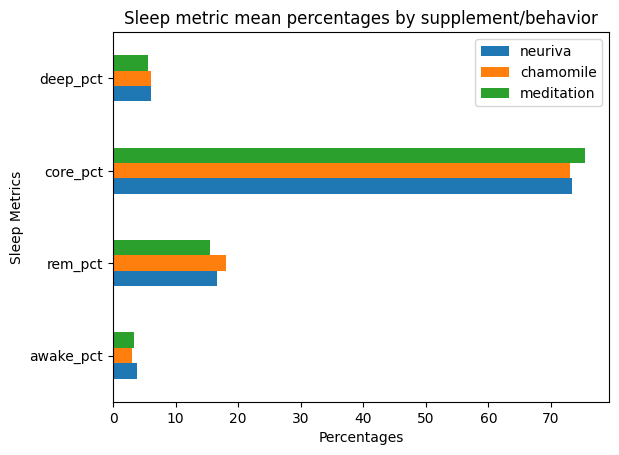

In [202]:
plotting_mean_df.plot(y=['neuriva', 'chamomile', 'meditation'], kind='barh')
plt.ylabel('Sleep Metrics')
plt.xlabel('Percentages')
plt.title('Sleep metric mean percentages by supplement/behavior')
plt.show()

### One Last Analysis...

Neuriva and chamomile tea can be consumed together. That very well may be our magic supplement formula, and it's worth trying that and gathering more sleep data over the coming months to see how that compares to our existing numbers. But just for fun, let's see what happens when we combine the REM and deep sleep numbers into one variable--does that give either Neuriva or chamomile the clear edge?